In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
pip install tensorflow

In [ ]:
import pandas as pd

# Đọc tập dữ liệu mới
data = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Education_dataset_V2/Drop cột/Demo_file.csv")  # Thay bằng đường dẫn tập dữ liệu của bạn

# Kiểm tra cấu trúc dữ liệu
print(data.info())
print(data.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18262 entries, 0 to 18261
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mssv          18262 non-null  object 
 1   id            18262 non-null  float64
 2   namsinh       18262 non-null  float64
 3   gioitinh      18262 non-null  float64
 4   khoahoc       18262 non-null  float64
 5   namhoc        18262 non-null  float64
 6   hocky         18262 non-null  float64
 7   diem          18262 non-null  float64
 8   diem_qt       18262 non-null  float64
 9   diem_th       18262 non-null  float64
 10  diem_gk       18262 non-null  float64
 11  diem_ck       18262 non-null  float64
 12  diem_hp       18262 non-null  float64
 13  dtb_toankhoa  18262 non-null  float64
 14  dtb_tichluy   18262 non-null  float64
dtypes: float64(14), object(1)
memory usage: 2.1+ MB
None
                                       mssv        id  namsinh  gioitinh  \
0  0000AC05XPvAibaEXe9B2to

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import numpy as np

# Xác định các cột đầu vào và đầu ra
features = ['namsinh', 'gioitinh', 'khoahoc', 'namhoc', 'hocky',
            'diem_qt', 'diem_th', 'diem_gk', 'diem_ck']
target = 'diem_hp'

# Loại bỏ các hàng bị thiếu
data = data.dropna(subset=features + [target])

# Xác định X (đầu vào) và y (đầu ra)
X = data[features]
y = data[target]

# Chuẩn hóa dữ liệu
scaler_X = MinMaxScaler()
scaler_y = MinMaxScaler()

X_scaled = scaler_X.fit_transform(X)
y_scaled = scaler_y.fit_transform(y.values.reshape(-1, 1))

# Chuyển dữ liệu thành định dạng 3D cho RNN (số mẫu, timesteps, số đặc trưng)
timesteps = 1
X_reshaped = X_scaled.reshape(X_scaled.shape[0], timesteps, X_scaled.shape[1])

# Chia tập dữ liệu thành tập huấn luyện và kiểm tra
X_train, X_test, y_train, y_test = train_test_split(X_reshaped, y_scaled, test_size=0.2, random_state=42)

# Kiểm tra kích thước dữ liệu
print("Kích thước X_train:", X_train.shape)
print("Kích thước y_train:", y_train.shape)


Kích thước X_train: (14609, 1, 9)
Kích thước y_train: (14609, 1)


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, Dense, Dropout

# Khởi tạo mô hình
model = Sequential()

# Thêm lớp RNN
model.add(SimpleRNN(64, input_shape=(timesteps, X_train.shape[2]), activation='relu', return_sequences=False))

# Thêm Dropout để giảm overfitting
model.add(Dropout(0.2))

# Thêm lớp đầu ra
model.add(Dense(1, activation='linear'))

# Biên dịch mô hình
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae'])

# Hiển thị kiến trúc mô hình
model.summary()


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ simple_rnn (SimpleRNN)               │ (None, 64)                  │           4,736 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 4,801 (18.75 KB)

 Trainable params: 4,801 (18.75 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
366/366 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - loss: 0.0308 - mae: 0.1328 - val_loss: 0.0069 - val_mae: 0.0538
Epoch 2/50
366/366 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 0.0124 - mae: 0.0827 - val_loss: 0.0055 - val_mae: 0.0472
Epoch 3/50
366/366 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.0109 - mae: 0.0752 - val_loss: 0.0050 - val_mae: 0.0468
Epoch 4/50
366/366 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0085 - mae: 0.0668 - val_loss: 0.0045 - val_mae: 0.0433
Epoch 5/50
366/366 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0077 - mae: 0.0630 - val_loss: 0.0045 - val_mae: 0.0413
Epoch 6/50
366/366 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0067 - mae: 0.0578 - val_loss: 0.0040 - val_mae: 0.0413
Epoch 7/50
366/366 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0061 - mae: 0.0539 - val_loss: 0.0039 - val_mae: 0.0409
Epoch 8/50
366/366 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0054 - mae: 0.0505 - val_loss: 0.0039 - val_mae: 0.0410
Epoch 9/50
366/366 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - lo

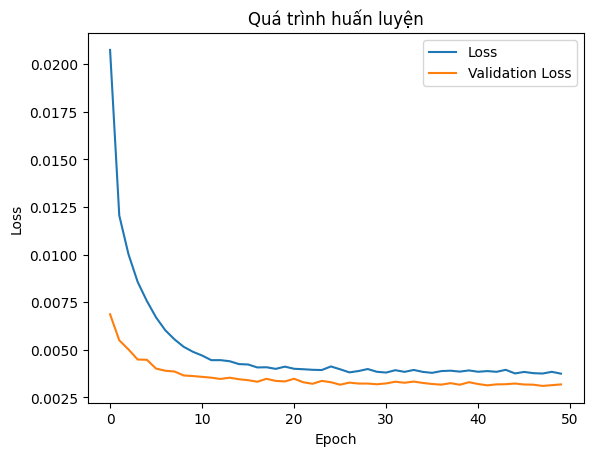

In [ ]:
# Huấn luyện mô hình
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.2, verbose=1)

# Vẽ biểu đồ mất mát trong quá trình huấn luyện
import matplotlib.pyplot as plt

plt.plot(history.history['loss'], label='Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title("Quá trình huấn luyện")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.show()


In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Dự đoán trên tập kiểm tra
y_pred = model.predict(X_test)

# Chuyển đổi giá trị dự đoán về dạng gốc
y_pred_original = scaler_y.inverse_transform(y_pred)
y_test_original = scaler_y.inverse_transform(y_test)

# Đánh giá hiệu suất
mae = mean_absolute_error(y_test_original, y_pred_original)
rmse = mean_squared_error(y_test_original, y_pred_original, squared=False)

print(f"MAE: {mae}")
print(f"RMSE: {rmse}")


115/115 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
MAE: 0.415198396037384
RMSE: 0.7027497450956162


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Tính MAE
mae = mean_absolute_error(y_test_original, y_pred_original)

# Tính RMSE
rmse = mean_squared_error(y_test_original, y_pred_original, squared=False)

# Tính R-squared
r2 = r2_score(y_test_original, y_pred_original)


# In kết quả
print(f"MAE: {mae}")
print(f"RMSE: {rmse}")
print(f"R-squared: {r2}")



MAE: 0.415198396037384
RMSE: 0.7027497450956162
R-squared: 0.8642377881368728


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [ ]:
import numpy as np
import pandas as pd

# Tạo dữ liệu ngẫu nhiên cho 1000 sinh viên
np.random.seed(42)  # Đảm bảo tính ngẫu nhiên ổn định
students_data = pd.DataFrame({
    "namsinh": np.random.randint(1995, 2005, 1000),      # Năm sinh
    "gioitinh": np.random.choice([0, 1], 1000),          # Giới tính (0: Nam, 1: Nữ)
    "khoahoc": np.random.randint(10, 20, 1000),          # Khóa học
    "namhoc": 2023,                                      # Năm học hiện tại
    "hocky": np.random.choice([1, 2], 1000),             # Học kỳ (1 hoặc 2)
    "diem_qt": np.random.uniform(5, 10, 1000),           # Điểm quá trình (5.0 - 10.0)
    "diem_th": np.random.uniform(5, 10, 1000),           # Điểm thực hành (5.0 - 10.0)
    "diem_gk": np.random.uniform(5, 10, 1000),           # Điểm giữa kỳ (5.0 - 10.0)
    "diem_ck": np.random.uniform(5, 10, 1000)            # Điểm cuối kỳ (5.0 - 10.0)
})

# Tính điểm học phần dựa trên công thức
students_data["diem_hp"] = (
    0.15 * students_data["diem_qt"] +
    0.15 * students_data["diem_th"] +
    0.30 * students_data["diem_gk"] +
    0.40 * students_data["diem_ck"]
)

# Hiển thị dữ liệu mẫu
print(students_data.head())

# Lưu danh sách sinh viên vào file CSV (nếu cần)
students_data.to_csv("students_data_with_diem_hp.csv", index=False)
print("Danh sách sinh viên đã được lưu vào 'students_data_with_diem_hp.csv'")


   namsinh  gioitinh  khoahoc  namhoc  hocky   diem_qt   diem_th   diem_gk  \
0     2001         0       19    2023      1  9.646140  9.311015  9.295559   
1     1998         0       11    2023      2  7.025513  6.569377  7.500291   
2     2002         1       11    2023      2  9.530555  7.690114  8.374466   
3     1999         1       19    2023      2  6.607479  9.200540  6.195332   
4     2001         0       16    2023      2  7.382185  9.947256  8.790202   

    diem_ck   diem_hp  
0  9.872197  9.581120  
1  9.878010  8.240525  
2  5.326384  7.225994  
3  9.109197  7.873481  
4  8.231550  8.529097  
Danh sách sinh viên đã được lưu vào 'students_data_with_diem_hp.csv'


In [ ]:
# Lọc dữ liệu đầu vào
features = ['namsinh', 'gioitinh', 'khoahoc', 'namhoc', 'hocky', 'diem_qt', 'diem_th', 'diem_gk', 'diem_ck']
X = students_data[features]

# Chuẩn hóa dữ liệu đầu vào
X_scaled = scaler_X.transform(X)

# Định dạng lại dữ liệu thành 3D cho mô hình RNN
X_reshaped = X_scaled.reshape((X_scaled.shape[0], 1, X_scaled.shape[1]))


In [ ]:
# Dự đoán điểm học phần
predicted_scores_scaled = model.predict(X_reshaped)

# Chuyển đổi điểm dự đoán về dạng gốc
predicted_scores = scaler_y.inverse_transform(predicted_scores_scaled)

# Thêm điểm dự đoán vào dữ liệu sinh viên
students_data["diem_hp_du_doan"] = predicted_scores.flatten()


32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


In [ ]:
# Tính sai số
students_data["sai_so"] = abs(students_data["diem_hp"] - students_data["diem_hp_du_doan"])

# Tính thống kê về sai số
mae = students_data["sai_so"].mean()  # Mean Absolute Error
rmse = np.sqrt((students_data["sai_so"]**2).mean())  # Root Mean Squared Error

# Hiển thị kết quả thống kê
print(f"MAE (Sai số trung bình): {mae:.2f}")
print(f"RMSE (Sai số bình phương trung bình): {rmse:.2f}")

# Hiển thị một số kết quả
print(students_data[["diem_hp", "diem_hp_du_doan", "sai_so"]].head())


MAE (Sai số trung bình): 0.54
RMSE (Sai số bình phương trung bình): 0.64
    diem_hp  diem_hp_du_doan    sai_so
0  9.581120         8.176185  1.404935
1  8.240525         8.859382  0.618857
2  7.225994         6.728758  0.497235
3  7.873481         8.125808  0.252327
4  8.529097         8.558971  0.029875


In [ ]:
students_data.to_csv("/content/drive/MyDrive/Colab Notebooks/Education_dataset_V2/Drop cột/students_comparison_results.csv", index=False)
print("Kết quả đã được lưu vào 'students_comparison_results.csv'")


Kết quả đã được lưu vào 'students_comparison_results.csv'


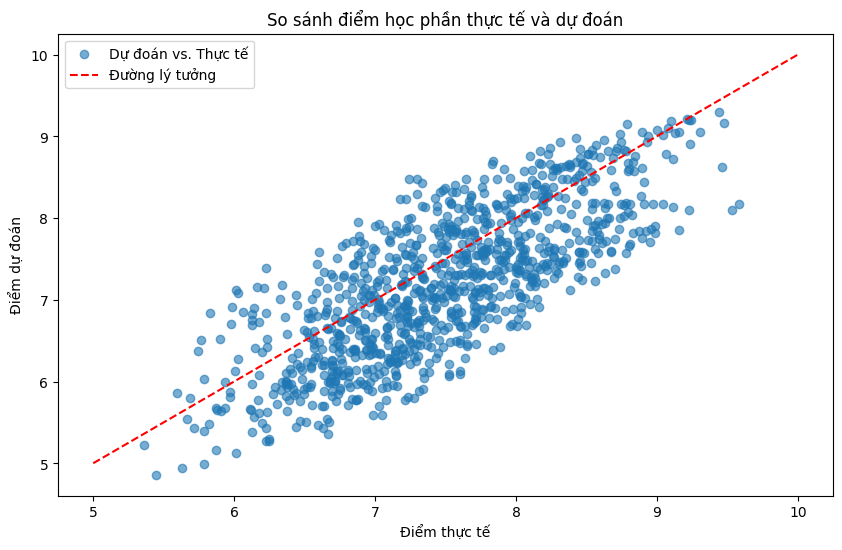

In [ ]:
import matplotlib.pyplot as plt

# Vẽ biểu đồ so sánh điểm thực tế và điểm dự đoán
plt.figure(figsize=(10, 6))
plt.scatter(students_data["diem_hp"], students_data["diem_hp_du_doan"], alpha=0.6, label="Dự đoán vs. Thực tế")
plt.plot([5, 10], [5, 10], color='red', linestyle='--', label="Đường lý tưởng")
plt.xlabel("Điểm thực tế")
plt.ylabel("Điểm dự đoán")
plt.title("So sánh điểm học phần thực tế và dự đoán")
plt.legend()
plt.show()


In [ ]:
print(students_data.sort_values(by="sai_so", ascending=False).head(10))


     namsinh  gioitinh  khoahoc  namhoc  hocky   diem_qt   diem_th   diem_gk  \
853     2000         0       16    2023      1  8.811513  7.996799  9.874521   
16      1996         0       17    2023      1  8.123919  6.641166  9.828195   
281     2000         0       13    2023      1  8.283155  7.088335  9.906288   
765     2003         0       19    2023      1  9.452048  6.904759  9.832792   
898     2000         0       18    2023      1  8.338803  5.793684  9.291615   
246     1995         0       14    2023      1  8.858135  7.888159  9.673978   
130     1998         0       14    2023      1  8.864607  6.327482  9.913698   
806     1998         0       19    2023      1  8.890126  7.416471  8.970072   
583     2000         0       17    2023      1  8.527304  8.560685  9.544132   
468     1997         0       18    2023      1  9.901844  8.969091  9.849094   

      diem_ck   diem_hp  diem_hp_du_doan    sai_so  
853  5.291189  7.600079         6.091132  1.508947  
16   5.275508